In [8]:
import  pandas as pd
import numpy as np

## Import Dataset

**Dataset Link:** [SympScan - Symptoms to Disease Dataset](https://www.kaggle.com/datasets/behzadhassan/sympscan-symptomps-to-disease)

In [9]:
dataset = pd.read_csv('Datasets/Diseases_and_Symptoms_dataset.csv')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96088 entries, 0 to 96087
Columns: 231 entries, diseases to low urine output
dtypes: int64(230), object(1)
memory usage: 169.3+ MB


In [11]:
dataset = dataset.drop_duplicates()
dataset.shape

(96088, 231)

In [12]:
dataset.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,sneezing,leg weakness,hysterical behavior,arm lump or mass,bleeding gums,pain in gums,diaper rash,hesitancy,back stiffness or tightness,low urine output
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Count and list unique disease classes

In [5]:
unique_classes = dataset['diseases'].unique()
print("Number of different classes (diseases):", len(unique_classes))
print("Class names:\n", unique_classes)

Number of different classes (diseases): 100
Class names:
 ['panic disorder' 'vaginitis' 'problem during pregnancy'
 'acute pancreatitis' 'asthma' 'infectious gastroenteritis'
 'acute sinusitis' 'cornea infection' 'marijuana abuse' 'bursitis'
 'actinic keratosis' 'chronic obstructive pulmonary disease (copd)'
 'spondylosis' 'injury to the arm' 'complex regional pain syndrome'
 'injury to the trunk' 'vulvodynia' 'concussion' 'hypoglycemia'
 'hiatal hernia' 'allergy' 'acute bronchospasm'
 'degenerative disc disease' 'pain after an operation' 'injury to the leg'
 'gout' 'otitis media' 'acute kidney injury' 'threatened pregnancy'
 'gum disease' 'gastrointestinal hemorrhage' 'anxiety'
 'conjunctivitis due to allergy' 'drug reaction' 'macular degeneration'
 'pneumonia' 'vaginal cyst' 'carpal tunnel syndrome' 'nose disorder'
 'dental caries' 'hypertensive heart disease'
 'seasonal allergies (hay fever)' 'fungal infection of the hair'
 'rectal disorder' 'stye' 'heart attack' 'obstructive sleep 

## Count and list all symptom feature columns

In [6]:
symptom_columns = dataset.drop('diseases', axis=1).columns
print("Number of different symptoms (features):", len(symptom_columns))
print("Symptom names:\n", list(symptom_columns))

Number of different symptoms (features): 230
Symptom names:
 ['anxiety and nervousness', 'depression', 'shortness of breath', 'depressive or psychotic symptoms', 'sharp chest pain', 'dizziness', 'insomnia', 'abnormal involuntary movements', 'chest tightness', 'palpitations', 'irregular heartbeat', 'breathing fast', 'hoarse voice', 'sore throat', 'difficulty speaking', 'cough', 'nasal congestion', 'throat swelling', 'diminished hearing', 'difficulty in swallowing', 'skin swelling', 'retention of urine', 'leg pain', 'hip pain', 'suprapubic pain', 'blood in stool', 'lack of growth', 'symptoms of the scrotum and testes', 'swelling of scrotum', 'pain in testicles', 'pus draining from ear', 'jaundice', 'white discharge from eye', 'irritable infant', 'abusing alcohol', 'fainting', 'hostile behavior', 'drug abuse', 'sharp abdominal pain', 'feeling ill', 'vomiting', 'headache', 'nausea', 'diarrhea', 'vaginal itching', 'painful urination', 'involuntary urination', 'pain during intercourse', 'fre

## Disease Class Distribution

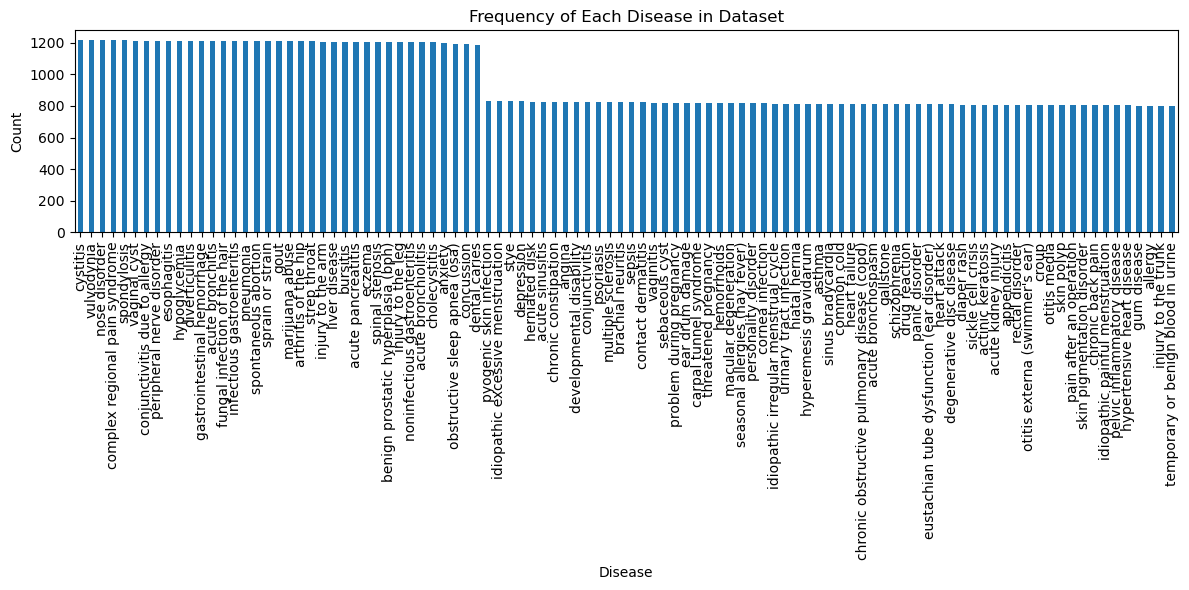

In [7]:
import matplotlib.pyplot as plt

disease_counts = dataset['diseases'].value_counts()

disease_counts.plot(kind='bar', figsize=(12,6))
plt.title("Frequency of Each Disease in Dataset")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Preparing data for training Models

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
X = dataset.drop('diseases', axis=1)
y = dataset['diseases']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

## Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Random Forest Accuracy: 0.8674506539008568
Confusion Matrix:
 [[171   0   0 ...   0   0   0]
 [  0 335   3 ...   0   0   0]
 [  0   2 244 ...   0   0   0]
 ...
 [  0   0   0 ... 286   1   5]
 [  0   0   0 ...   1 248   7]
 [  0   0   0 ...   3   2 339]]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute macro-averaged scores
precision = precision_score(y_test, rf_preds, average='macro')
recall = recall_score(y_test, rf_preds, average='macro')
f1 = f1_score(y_test, rf_preds, average='macro')

print(f"Macro-Averaged Precision: {precision:.4f}")
print(f"Macro-Averaged Recall:    {recall:.4f}")
print(f"Macro-Averaged F1 Score:  {f1:.4f}")


Macro-Averaged Precision: 0.8658
Macro-Averaged Recall:    0.8655
Macro-Averaged F1 Score:  0.8652


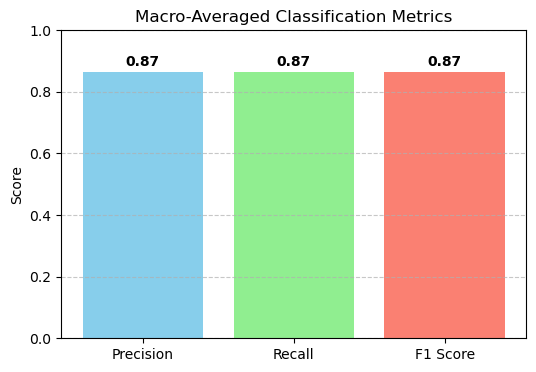

In [13]:
import matplotlib.pyplot as plt

# Prepare data for plotting
metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title("Macro-Averaged Classification Metrics")
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:
import pickle

In [15]:
pickle.dump(rf,open('rf.pkl','wb'))

In [22]:
import sklearn
print(sklearn.__version__)

1.6.1
